<a href="https://colab.research.google.com/github/Tanay2109/Black-Scholes-Option-Pricing/blob/main/BS_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
from datetime import date
import numpy as np
from scipy.stats import norm

Curr_date = date.today()
date_entry = input("Enter a date in YYYY-MM-DD format: ")
year, month, day = map(int, date_entry.split('-'))
Exp_date = datetime.date(year, month, day)
diff = Exp_date - Curr_date
t = diff.days/365

S= float(input("Enter Stock Price($): "))
k= float(input("Enter Strike Price($): "))
r= float(input("Enter Risk Free Rate(%): "))
vol_d= float(input("Enter Volatility(daily): "))
vol_an= vol_d*np.sqrt(252)

d1= (np.log(S/k)+(r+((vol_an*vol_an)/2))*t)/(vol_an*np.sqrt(t))
d2= d1-(vol_an*np.sqrt(t))

Call=S*norm.cdf(d1)-k*np.exp(-r*t)*norm.cdf(d2)
Put=k*np.exp(-r*t)*norm.cdf(-d2)-S*norm.cdf((-d1))

print("Maturity: ",t)
print("Stock Price: $",S)
print("Strike Price: $",k)
print("Risk Free Rate: ",r,"%")
print("Volatility(Annualized): ",vol_an)
print("d1: ",d1)
print("d1: ",d2)
print("Call Option using Black Scholes: ",Call)
print("Put Option using Black Scholes: ",Put)

Enter a date in YYYY-MM-DD format: 2025-06-13
Enter Stock Price($): 141.4
Enter Strike Price($): 145.0
Enter Risk Free Rate(%): 4.50
Enter Volatility(daily): 0.03798
Maturity:  0.021917808219178082
Stock Price: $ 141.4
Strike Price: $ 145.0
Risk Free Rate:  4.5 %
Volatility(Annualized):  0.6029138087653989
d1:  0.8679511139591227
d1:  0.7786917491321474
Call Option using Black Scholes:  11.421167193193199
Put Option using Black Scholes:  1.402443946288436


In [2]:
!pip install yfinance

In [4]:
import yfinance as yf
from datetime import datetime, date, timedelta
import numpy as np
from scipy.stats import norm

Opt_name=input("Enter Contract Name: ")
Stk_name= Opt_name[:4]
dt= Opt_name[4:10]
dt2 = datetime.strptime(dt, "%y%m%d")
year = dt2.year
month = dt2.month
day = dt2.day
Exp_date= date(year,month,day)
Curr_date=date.today()
diff= Exp_date-Curr_date
t= diff.days/365

ticker = yf.Ticker(Stk_name)
S = ticker.info['regularMarketPrice']
hist= ticker.history(period="1y")

x=Opt_name[11:]
k=int(x)/1000

o=Opt_name[10]

end_date = datetime.today()
start_date = end_date - timedelta(days=252)
data = yf.download(Stk_name, start=start_date, end=end_date, progress=False)
daily_ret= data['Close'].pct_change().dropna()
daily_vol = daily_ret.std()
ann_vol= daily_vol.iloc[0] * (252**0.5)

r= float(input("Enter Risk Free Rate(%): "))

d1= (np.log(S/k)+(r+((ann_vol*ann_vol)/2))*t)/(ann_vol*np.sqrt(t))
d2= d1-(ann_vol*np.sqrt(t))

Call_BS=S*norm.cdf(d1)-k*np.exp(-r*t)*norm.cdf(d2)
Put_BS=k*np.exp(-r*t)*norm.cdf(-d2)-S*norm.cdf((-d1))

options_data = ticker.option_chain()
call_options = options_data.calls
call_opt = call_options[call_options['strike'] == k]

put_options = options_data.puts
put_opt = put_options[put_options['strike'] == k]

call= float(call_opt["lastPrice"])
put= float(put_opt["lastPrice"])


print("Stock Name: ",Stk_name)
print("Expiry date: ",Exp_date)
print("Current date: ",Curr_date)
print("Maturity: ",t)
print("Stock Price: $",S)
print("Strike Price: $",k)
if o=="C":
  print("Option Type: Call")
elif o=="P":
  print("Option Type: Put")
print("Volatility(Annualized): ",ann_vol)
print("Risk Free Rate: ",r,"%")
print("d1: ",d1)
print("d2: ",d2)
print("Current Call Option Price: ",call)
print("Call Option Price using Black Scholes: ",Call_BS)
if call>Call_BS:
  print("Call Option Overvalued")
else:
  print("Call Option Undervalued")

print("Current Put Option Price: ",put)
print("Put Option Price using Black Scholes: ",Put_BS)
if put>Put_BS:
  print("Put Option Overvalued")
else:
  print("Put Option Undervalued")

Enter Contract Name: TSLA250606P00230000
Enter Risk Free Rate(%): 4.50
Stock Name:  TSLA
Expiry date:  2025-06-06
Current date:  2025-06-05
Maturity:  0.0027397260273972603
Stock Price: $ 296.16
Strike Price: $ 230.0
Option Type: Put
Volatility(Annualized):  0.7831140524861373
Risk Free Rate:  4.5 %
d1:  6.489119086773805
d2:  6.4481290238550235
Current Call Option Price:  72.95
Call Option Price using Black Scholes:  68.97820822511707
Call Option Overvalued
Current Put Option Price:  0.05
Put Option Price using Black Scholes:  7.777557741898046e-11
Put Option Overvalued


<ipython-input-4-3f5d03eff24b>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  call= float(call_opt["lastPrice"])
<ipython-input-4-3f5d03eff24b>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  put= float(put_opt["lastPrice"])


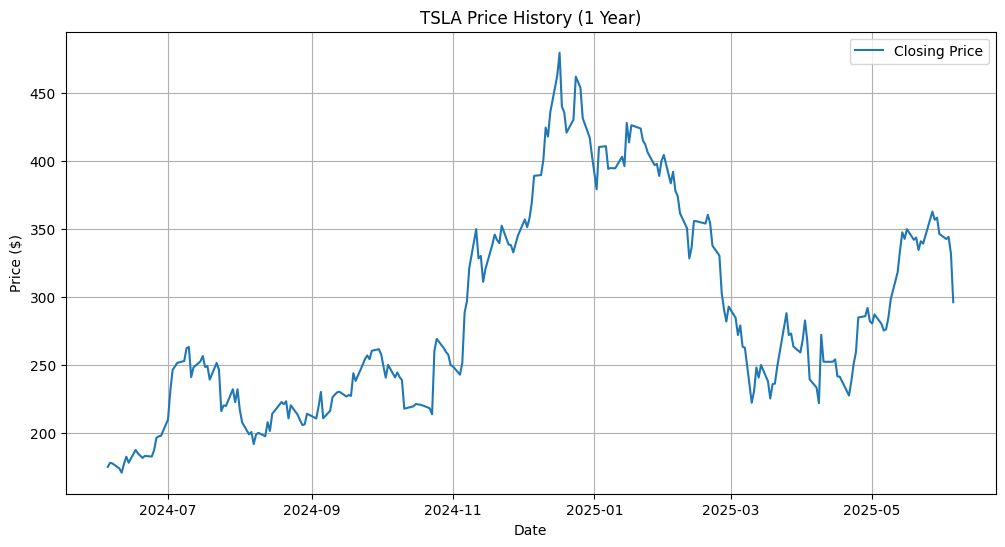

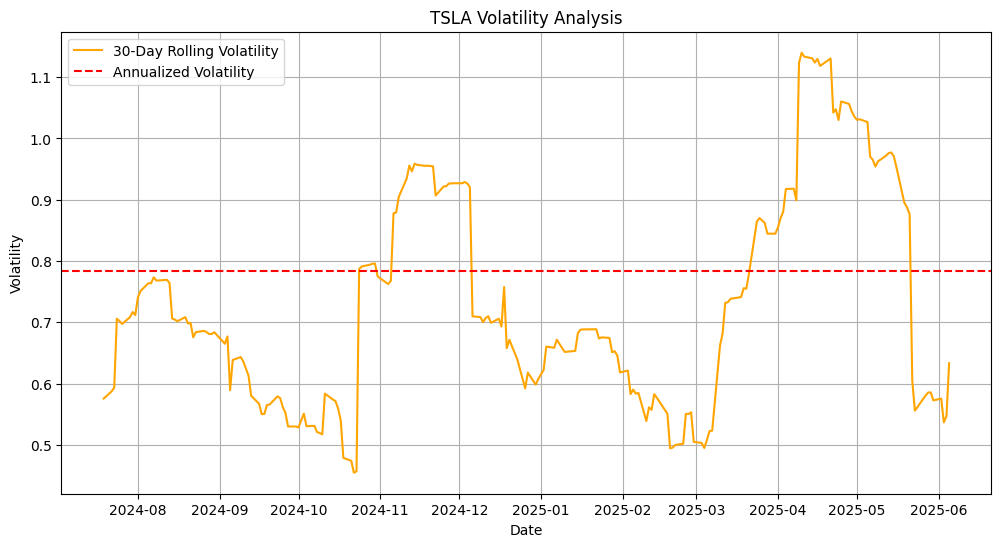

In [5]:
import matplotlib.pyplot as plt

# Add this after calculating volatility
plt.figure(figsize=(12, 6))
plt.plot(hist['Close'], label='Closing Price')
plt.title(f'{Stk_name} Price History (1 Year)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate rolling 30-day volatility
rolling_vol = hist['Close'].pct_change().rolling(30).std() * np.sqrt(252)
plt.figure(figsize=(12, 6))
plt.plot(rolling_vol, label='30-Day Rolling Volatility', color='orange')
plt.axhline(y=ann_vol, color='r', linestyle='--', label='Annualized Volatility')
plt.title(f'{Stk_name} Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()